In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1920,
        'height': 1080,
        'scroll': True,
})

{'width': 1920, 'height': 1080, 'scroll': True}

# Week 02: Wednesday, AST 5011: Astrophysical Systems

## An Overview of Stellar Evolution

### Michael Coughlin <cough052@umn.edu>

With contributions totally ripped off from Carl Fields (UA), Mike Zingale (SUNY), Cole Miller (UMD), and Abi Nolan (Purdue).


## The Hertzsprung-Russell (HR) Diagram

Two dimensional diagram used to characterize key observational properties of stars. The Y-axis is a measure of the power output of the star, while the abscissa (X-axis) is used to denote color (or surface temperature) of the star. 


It has two main flavors:

**Observer's HR Diagram:** Y-axis might express power in terms of _magnitudes_ while the X-axis would be _color_, the difference in magnitudes between two spectral bands.


**Theorist's HR Diagram:** Y-axis is usually express power in terms of _luminosity_ while the X-axis would be _effective temperature_ ($T_{\rm{eff}}$).

The relationship between luminosity and effective temperature is given by the following equation:

$$
L = 4 \pi \sigma R^2 T^4_{\rm{eff}}
$$


where $\sigma$ is the Stefan-Boltzmann's constant with value of $5.6705\times10^{-5} \textrm{erg} \textrm{cm}^{-2} \textrm{K}^{-4} \textrm{s}^{-1}$

In this equation $R$ is assumed to be the radius at the visible surface of the star (the _photosphere_) and 
$T_{\rm{eff}}$ is the temperature at that surface.

We can similarly create a scaled version of the above equation plugging in $L_{\odot}$ and $R_{\odot}$ to find

$$
\left ( \frac{L}{L_{\odot}} \right ) = 8.973\times10^{-16} \left ( \frac{R}{R_{\odot}} \right )^{2} T^4_{\rm{eff}}
$$

Example HR diagram from Iben 1991:

![An illustrative Hertzsprung-Russell diagram showing nearby and bright stars as seen from the earth](figures/hr.jpg)

An illustrative Hertzsprung-Russell diagram showing nearby and bright stars as seen from the earth.

Note, the abscissa is backwards! From left to right, we go from _hotter_ to _cooler_ stars. 

## In-class Exercise: Hertzsprung-Russell Diagram

In this exercise, you will explore the HR diagram by calculating stellar luminosities from radii and effective temperatures, and then plotting stars in HR space.

---

### Part A: Luminosity Calculation

The luminosity of a star is given by:

$$
L = 4 \pi \sigma R^2 T_{\rm eff}^4
$$

or in solar units:

$$
\frac{L}{L_\odot} = 8.973\times10^{-16} \left( \frac{R}{R_\odot} \right)^2 T_{\rm eff}^4
$$

1. Compute the luminosity for the following stars:

| Star Type        | R / R_sun | T_eff (K) |
|-----------------|------------|------------|
| Main Sequence G  | 1          | 5800       |
| Main Sequence O  | 10         | 40000      |
| Red Giant        | 50         | 4000       |
| White Dwarf      | 0.01       | 100000     |

### Part B: Plotting an HR Diagram in Python

1. Using the stars above, plot an HR diagram:

   - Y-axis: luminosity (log scale)  
   - X-axis: effective temperature (log scale, reversed so hot stars are on the left)  

2. Label each star with its type.

### Part C: Conceptual Questions
- Why is the X-axis reversed in standard HR diagrams?
- Which star types are located on the upper-left, lower-left, and upper-right regions of the HR diagram?
- How would a star move on the HR diagram as it evolves from the main sequence to the red giant phase?


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example star data
stars = {
    "Sun": {"Teff": 5778, "L": 1, "type": "G-type"},
    "Sirius": {"Teff": 9940, "L": 25, "type": "A-type"},
    "Betelgeuse": {"Teff": 3500, "L": 120000, "type": "M-type"},
    "Rigel": {"Teff": 12100, "L": 120000, "type": "B-type"},
    "Proxima Cen": {"Teff": 3042, "L": 0.0017, "type": "M-type"}
}

# Extract arrays
Teff = np.array([star["Teff"] for star in stars.values()])
L = np.array([star["L"] for star in stars.values()])
labels = [star["type"] for star in stars.values()]

# Create plot
plt.figure(figsize=(6,8))

# Plot luminosity vs. temperature
# plt.scatter(...)  # add here

# Reverse X-axis (hotter on left)
# plt.xscale('log')
# plt.yscale('log')
# plt.gca().invert_xaxis()

# Label each star
# for i, label in enumerate(labels):
#     plt.text(...)  # add here

plt.xlabel("Effective Temperature (K)")
plt.ylabel("Luminosity (L/L_sun)")
plt.title("Hertzsprung-Russell Diagram")
plt.show()



<details>
<summary>Solution</summary>

### Part A: Luminosity Calculation (L / L_sun)

- G MS: 1^2 * 5800^4 * 8.973e-16 ≈ 1 L_sun  
- O MS: 10^2 * 40000^4 * 8.973e-16 ≈ 2.3e5 L_sun  
- Red Giant: 50^2 * 4000^4 * 8.973e-16 ≈ 1.1e3 L_sun  
- White Dwarf: 0.01^2 * 100000^4 * 8.973e-16 ≈ 9 L_sun  

---

### Part B: HR Diagram Plot

- Hot stars on left, cool stars on right (invert_xaxis).  
- Luminosity increases upward (log scale).  
- G MS near 1 L_sun, T=5800 K  
- O MS very luminous, hot → top-left  
- Red Giant very luminous, cool → top-right  
- White Dwarf hot but faint → bottom-left

#### Key Python Lines

```python
plt.scatter(Teff, L, color='blue')

plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()

for i, label in enumerate(labels):
    plt.text(Teff[i]*1.05, L[i]*1.05, label)
```

---

### Part C: Conceptual Questions

1. X-axis is reversed because observationally hotter stars are plotted on the left for historical reasons (Bluer = Left).  
2. Upper-left: O-type MS stars; lower-left: white dwarfs; upper-right: red giants.  
3. Main-sequence star → core hydrogen depletion → expands and cools → moves to upper-right (red giant branch).

# Pre-Main Sequence Evolution

## The Hayashi track 

Key considerations for protostellar models:

   1. Because of the high total luminosity, the interior of a nonaccreting hydrostatic protostellar model is convective.
   2. For fully convective stars, it is not possible to build a hydrostatic model if the temperature falls below a certain value,thus there is a "forbidden region" in the H-R diagram.
   3. The boundary of this forbidden region is almost vertical for a given mass star, so that as a star contracts it evolves at roughly constant effective temparture.
   
This _forbidden region_ is known as the [**Hayashi track**](https://en.wikipedia.org/wiki/Hayashi_track).

A protostar leaves the Hayashi track when it either deviates to the [_Henyey track_](https://en.wikipedia.org/wiki/Henyey_track) or nuclear fusion occurs and the star reaches the main sequence. 
This differences are all reliant of the initial mass of the star.

Example HR diagram from [Stahler 1988](https://ui.adsabs.harvard.edu/abs/1988ApJ...332..804S/abstract) showing low mass stellar evolution tracks along the Hayashi and Henyey tracks until reaching the Main Sequence:

![Shown are pre-main sequence evolutionary tracks adopted by Stahler (1988) from various sources. Masses are in solar units. Also shown are the observed locations of a number of T Tauri stars](figures/pms.jpg)

Shown are pre-main sequence evolutionary tracks adopted by Stahler (1988) from various sources. Masses are in solar units. Also shown are the observed locations of a number of T Tauri stars. 

**T Tauri Stars** are those that are still contracting towards the main-sequence. 

## Single Stars On and Near the Main Sequence


### What's so main about this sequence?
Often theorists will say a star has reached the main-sequence if the following is true:

1. chemically homogeneous with identical or very similar compositions
2. hydrostatic and thermal balance
3. energy is derived solely from nuclear burning

We can also define the Zero-Age Main-Sequence (ZAMS) as the time at which the stellar model satisfies these requirements. 

**Key takeaway:** ZAMS solutions for stars with identical mass or composition in stellar modeling are not unique due to many uncertainties from: equations of state, opacities, and nuclear generation rates. We will discuss all of these in more detail in the following weeks. 

## Evolution of Single Stars Off the Main Sequence

![Mass Cut Diagram](figures/mass_cut.png)

HKT Figure 2.4: Mass cut diagram


Evolution off of the main sequence will depend on the initial mass. Lets categorize them as follows:

### **Unevolved Lower ZAMS:** 
Using HKT Eq. 1.88 $t_{\rm{nuc}}\approx 10^{10}\left ( \frac{M}{M_{\odot}} \right )^{-2.5} \geq 17$ Gyr, greater than a Hubble time for stars $\lt 0.8 M_{\odot}$.

### **Lower:**
Mass range of $\approx0.8-1.0M_{\odot}$ to $\approx2.0-2.3M_{\odot}$ depending on composition. These mass ranges undergo helium ignition in the electron degenerate regime (they are to the right of the $\epsilon_{\rm{F}}/kT=10$). Models to the left are non-degenerate and obey ideal gas laws. 

### **Intermediate:**
At mass ranges of about 3 $M_{\odot}$ to about 8-9 $M_{\odot}$ helium ignition occurs in a nondegenerate scenario leading to the build up of a primarily degenerate carbon ($^{12}$ C) and ($^{16}$ O) core. 

### **Upper (aka Massive):**
Stars about $9 M_{\odot}$ or greater. The main distinction being from intermediate masses being that a non-degenerate CO core is formed and maintained until C-ignition. 



![Evolution of Single Stars Off the Main Sequence in T-Rho](figures/post_ms.jpg)

Evolution of stars off of the main sequence for three stellar tracks. 

1. For all the stellar tracks shown below (except the massive star model of 15 $M_{\odot}$), hydrogen depletion/growth of the _helium_ core is surrounded by an active H-burning shell which provides a power source.

2. The helium core continues to contract, due to the lack of a burning source. 

3. The contraction and heating of the He-core and the H-shell drives expansion of the stellar envelope. The star becomes evolve towards the red giant branch (3-6). 

Where the red giant branch (RGB) is characterized by a continual expansion and reddening of the star to lower effective temperatures.


![Evolution of Single Stars Off the Main Sequence](figures/post_ms_hr.jpg)


## In-class Exercise: Single Stars On and Near the Main Sequence

In this exercise, you will explore the lifetimes and evolution of stars on and off the main sequence.

### Part A: Main-Sequence Lifetime

Using the approximate main-sequence lifetime relation:

$$
t_{\rm{nuc}} \approx 10^{10} \left( \frac{M}{M_\odot} \right)^{-2.5} \ \text{yr}
$$

1. Compute the main-sequence lifetime for the following stars (in Gyr):

| Mass (M_sun) | 0.5 | 0.8 | 1.0 | 2.0 | 5.0 | 10.0 | 15.0 |

2. Classify each star into one of the categories below based on lifetime:

- Unevolved lower ZAMS: $t_{\rm{nuc}} \ge 17$ Gyr  
- Lower: ~0.8–2.3 M_sun  
- Intermediate: ~3–8 M_sun  
- Upper / Massive: >9 M_sun

### Part B: Python Lifetime Plot

1. Write a Python function to compute $t_{\rm{nuc}}$ for any mass.  
2. Plot $t_{\rm{nuc}}$ vs $M$ (0.5–20 M_sun) on a log-log scale.  
3. Shade or annotate the regions corresponding to the four mass categories.

### Part C: Conceptual Questions

- Why do very low-mass stars remain on the main sequence longer than a Hubble time?
- What drives the expansion of the stellar envelope as a star evolves off the main sequence?
- For intermediate-mass stars, what happens to the helium core and H-burning shell during post-MS evolution?
- Explain why massive stars develop non-degenerate CO cores while lower-mass stars develop degenerate cores.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Nuclear lifetime function
def t_nuc(M):
    """
    Compute main-sequence lifetime (years) given stellar mass in M_sun.
    t_nuc ~ 1e10 * (M/M_sun)^(-2.5)
    """
    # return ... # add here

# Stellar masses
M = np.linspace(0.5, 20, 200)

# Compute lifetimes
# t = ... # add here

# Plot
plt.figure(figsize=(8,6))
# plt.plot(...) # add here

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Mass (M_sun)")
plt.ylabel("Main-Sequence Lifetime (years)")
plt.title("Stellar Nuclear Lifetimes vs Mass")

# Optional: annotate mass categories
# plt.axvspan(...) # add here
# plt.text(...)    # add here

plt.show()


<details>
<summary>Solution</summary>

### Part A: Main-Sequence Lifetime (Gyr)

| Mass (M_sun) | t_nuc (Gyr) | Category                 |
|--------------|-------------|-------------------------|
| 0.5          | ~57.0       | Unevolved lower ZAMS    |
| 0.8          | ~22.0       | Unevolved lower ZAMS    |
| 1.0          | ~10.0       | Lower                   |
| 2.0          | ~1.8        | Lower                   |
| 5.0          | ~0.18       | Intermediate            |
| 10.0         | ~0.056      | Upper / Massive         |
| 15.0         | ~0.024      | Upper / Massive         |

---

### Part B: Python Lifetime Plot

- The plot shows very low-mass stars live much longer than the Hubble time.  
- Lifetime drops sharply for high-mass stars due to the steep mass-luminosity relation.  
- Shaded regions indicate the four categories of stellar mass evolution.

#### Key Python Lines
```python
def t_nuc(M):
    return 1e10 * M**(-2.5)

t = t_nuc(M)
plt.plot(M, t, color='blue', lw=2)

# Example annotation of mass categories
plt.axvspan(0.0, 0.8, color='green', alpha=0.2, label='Unevolved lower ZAMS')
plt.axvspan(0.8, 2.3, color='yellow', alpha=0.2, label='Lower mass')
plt.axvspan(3, 9, color='orange', alpha=0.2, label='Intermediate mass')
plt.axvspan(9, 20, color='red', alpha=0.2, label='Massive')
```

---

### Part C: Conceptual Answers

1. Very low-mass stars have low luminosities → burn hydrogen very slowly → remain on main sequence longer than a Hubble time.  
2. Expansion is driven by helium core contraction and heating of the surrounding hydrogen-burning shell → thermal pressure inflates the envelope.  
3. Intermediate-mass stars: helium core contracts and becomes degenerate; H-burning shell surrounds core and supplies luminosity → star moves toward red giant branch.  
4. Massive stars: high core temperatures prevent degeneracy → CO core remains non-degenerate until carbon ignition; lower-mass stars have degenerate helium cores due to lower pressure and temperature.

# Late Stages of Evolution

## Lower Mass Stars ($0.8M_{\odot}-3M_{\odot}$)

Starting with the lower main-sequence stars we can look at a collection of isochrones or, theoretical stellar models of stars of varying mass but similar composition at fixed points in time. Isochrones are great for studying stellar populations such as those in globular clusters. 


![MIST CMD](figures/mist_cmd_hr.jpg)

Isochrones are powerful tools for estimating the age of a cluster! Doing so requires identification of the main-sequence turnoff (TO) time. It is also assumed that all the stars were born at roughly the same time. 


![Observational HR diagram](figures/hr_labeled.jpg)

In the above image, we show a color-magnitude diagram for the globular cluster M3. Key observational epochs are identified and label:

**Main Sequence (MS)** core-hydrogen burning phase

**Turnoff Point (TO)**: The time at which the star departs the MS. 

**Sub-Giant Branch (SGB)**:shell-burning hydrogen phase from TO to the Hayashi line

**Blue Stragglers (BS)**: stars hotter and more blue than expected, emulating a younger population possibly from a merger

**Red Giant Branch (RGB)**: shell-burning hydrogen phase along the Hayashi line until helium ignition

**Horizontal Branch (HB)**: core helium burning phase

**Asymptotic Giant Branch (AGB)**: shell hydrogen and shell helium burning phase

**Post-AGB Branch (P-AGB)**: final evolution from AGB to WD phase





## Intermediate-Mass Stars ($3M_{\odot}-9M_{\odot}$)

In the below theoretical HR diagram we can follow the post-main sequence evolution of a $5M_{\odot}$ stellar model. 


![5msun](figures/5msun_post_ms.jpg)


## Massive Stars ($\gt9M_{\odot}$)

These stars have noticeably different characteristics:

They avoid the helium flash, they do not form _degenerate_ CO cores after He-depletion, but they can experience significant mass loss induced by their luminosities. In massive blue stars, this is driven by radiation pressure on strong spectral lines. 

Some definitions:

**Wolf-Rayet (WR) Stars**: characterized by strong emission lines that dominate the optical spectrum. These stars lie near the main sequence but their spectra indicate a strong deficiency or absence of hydrogen.


![mass_loss](figures/mass_loss.jpg)

Figure showing stars with larger luminosity experience more violent mass loss. 

# Evolution in Close Binary Systems 

We define a close binary system as one containing two stars in which the evolution of either star is strongly influenced by the presence of the other. 

Most stars are in binaries (or multiples) and of that, half are close binary systems. 


Some Defitions:

1. $a$ - semi-major axis of the system
2. $q$ - mass ratio ($M_{1}/M_{2}$), where $M_{1}$ is the primary (or "donor") star.

## Roche Lobe
region around a star in a binary system within which orbiting material is gravitationally bound to that star. It is an approximately teardrop-shaped region bounded by a critical gravitational equipotential, with the apex of the teardrop pointing towards the other star (the apex is at the L1 Lagrangian (points of equilibrium for small-mass objects under the gravitational influence of two massive orbiting bodies) point of the system).

![Roche Lobe](figures/roche_lobe.jpeg)



## Mass Transfer

When a star "exceeds its Roche lobe", its surface extends out beyond its Roche lobe and the material which lies outside the Roche lobe can "fall off" into the other object's Roche lobe via the first Lagrangian point. In binary evolution this is referred to as mass transfer via Roche-lobe overflow.

If mass transfer is large enough, an _accretion disk_ will form about Star 2!


## The First Mass Transfer Phase and its Consequences

Let's consider the scenario where the primary (donor or $M_{1}$) will fill it's Roche Lobe at some point. 

Three cases:


* **Case A** - RLOF occurs during core hydrogen burning. Typically short period binaries. 

* **Case B** - RLOF occurs after hydrogen core exhaustion but before helium ignition.

* **Case C** - RLOF occurs after helium core exhaustion.


An example of Case A mass transfer:

![case a](figures/case_a.png)

We can define an equivalent radius of a given Roche lobe for a sphere of equivalent volume of the lobe, leading to the following dependence on the seperation and mass ratio:

$$
\frac{R_{\rm{L,1}}}{a}  = \frac{0.49 q^{2/3}}{0.6 q^{2/3} + \textup{ln}(1+q^{1/3})}
$$

for $0.1 \lt q \lt 10$.

In the above example, you might expect the now more massive secondary to also undergo mass transfer once filling its Roche lobe. 

## Example Binary Star System

### Detached Binary

![Detached](figures/detached.png)

In a detached configuration neither star fills its Roche lobe. Most stars are this. 

### Semi-Detached Binary

![Semi-Detached](figures/semidetached.png)

In a semidetached configuration one star fills its Roche lobe.

### Contact Binary

![Contact](figures/contact.png)

In a contact configuration both stars overfill their Roche lobes.


**Credit: Philip D. Hall**

### Conservative Binary Evolution 

Conservation of mass, angular momentum, etc. 

Let's remind ourselves of some timescales from shortest to longest:


**dynamical time scale** - time scale on which a star counteracts a perturbation of its hydrostatic equilibrium. Given by the ratio of the radius of the star R and the average sound velocity of the stellar matter:

$$
\tau_{\rm{dyn}} = \frac{R}{c_{\rm{s}}} \approx 0.04 \left (\frac{M_{\odot}}{M} \right )^{1/2} \left (\frac{R}{R_{\odot}} \right )^{3/2}~\rm{day}
$$

**thermal or Kelvin-Helmholtz time scale** - time scale on which a star reacts when energy loss and energy production are no longer in equilibrium. Given by the ratio of the thermal energy content of the star $E_{th}$ and the luminosity $L$.


$$
\tau_{\rm{KH}} = \frac{E_{\rm{th}}}{L} \approx \frac{GM^2}{2 R L} 1.5\times10^{7} \left (\frac{M}{M_{\odot}} \right )^{2} \left (\frac{R_{\odot}}{R} \right )  \left (\frac{L_{\odot}}{L} \right ) ~\rm{yr}
$$

**nuclear time scale** - This is the time scale on which a star uses its nuclear fuel. It is given by the product of the available fusable matter $M_{\rm{core}}$ and the fusion energy per unit mass $Q$, divided by the stellar luminosity.

$$
\tau_{\rm{nuc}} = 0.007 \frac{M_{\rm{core}c^2}}{L} \approx 10^{10} \left (\frac{M}{M_{\odot}} \right ) \left (\frac{L_{\odot}}{L} \right )~\rm{yr}
$$

## Example Case A Binary System


### Only looking at the Primary

Let's consider a binary star system with $M_{1}=10M_{\odot}$, $M_{2}=8.9M_{\odot}$, and $P=2.2 $ days.

![case a time evolution](figures/case_a_time_evol.png)

In this binary, we can observe the following: 

1. The primary expands on the MS until filling its Roche Lobe (A to B)
2. From B to C, a period of rapid mass (thermal-timescale) mass transfer, with a max of $\dot{M}_{\rm{max}}\approx -M_{1}/\tau_{\rm{KH},1}$ as the primary readjusts to reach equilibrium. 
3. After reaching new equilibrium, mass transfer continues from C to B but now limited by $\tau{\rm{nuc}}$ timescale. 


### Looking at both stars

Now, let's consider the Primary and Secondary on the same image and their luminosity responses:

Reminder: 

<span style="color:cyan">Primary is Cyan.</span>

<span style="color:yellow">Secondary is Yellow.</span>

![case a L evolution](figures/case_a_L_evol.png)

1. Primary increases in L until RLOF, then decreases due to mass transfer/loss. Secondary response is an increase in L due to the accretion. From B to C. 
2. From C to D, the nuclear timescale limited takes place with stars in new equilibrium. 
3. Net result is that the primary appears over luminous for its mass, and secondary has appropriate L and R for its new mass on the MS. 

### Translating to an HR diagram 

Example of the HR diagram for the binary system.

![case a HR](figures/case_a_HR.png)

# Fate of Close Binary Star Systems

We can have a variety of binary star systems created, below are a few examples which include a period of common-envelope evolution. 


![binary evolution](figures/bin_evol.png)

Examples of evolutionary channels where CEE plays a crucial role in the formation of the final system.
_Left_:presents a variety of ways to form potential SN Ia progenitors. _Right_:the formation of systems containing neutron stars: one route by which a binary millisecond pulsar may form, and one way to produce a double pulsar (formation of which could also in- volve an additional CE phase before the first SN).


Credit: [Ivanova et al 2013](https://link.springer.com/article/10.1007/s00159-013-0059-2).



## Common Envelope Onset and Evolution

**Common-envelope** Evolution occurs when the companion of the mass-losing star becomes engulfed by the envelope of the donor. CEE can be initiated by two main circumstances:

1. **dynamically unstable mass transfer** - when the donor cannot shrink fast enough to stay within its Roche lobe
    - occurs when the donor has a deep convective envelope (late case B and case C) and is of similar mass or more massive than its companion, 
    - **or** when the donor has a radiative envelope (early case B) but is much more massive than its companion, by a factor >∼ 4 -- high $q=M_{d}/M_{a}=M_{2}/M_{1}$.
2. when the **spin angular momentum is more than ~1/3 times the orbital angular momentum**, which causes tidal interaction to become unstable and the companion is literally dragged into the donor’s envelope by tidal forces.
    - can occur when the mass ratio is very large, large $q$.
    
    
Okay, so you might be wondering how I got myself in this situation -- what happens to the companion??


Once the companion is inside the donor’s envelope:

1. the friction between the motion of the companion and the envelope removes angular momentum from the orbital motion, and releases energy
2. the orbit shrinks, and the envelope is brought into rotation and heated
3. This process continues until enough energy is added to the envelope to expel it.

OR, 

4. the companion star may spiral-in until it merges with the core of the mass donor


### Outcome of CEE

The outcome of a common envelope is often estimated based on the picture of conversion of orbital energy into binding energy of the envelope.

We can measure its efficiency

$$
\alpha_{\rm{CE}} = \frac{ \Delta E_{\rm{bind}} }{ \Delta E_{\rm{orbit}} }
$$

$$
\Delta E_{\rm{orb}} = \frac{G M_{a} M_{core,d} }{2 a_{f}} - \frac{G M_{a} M_{d} }{2 a_{i}}
$$

and $\Delta E_{\rm{bind}}$ is estimated as the binding energy of the envelope at the beginning of CEE:

$$
\Delta E_{\rm{bind}} = \frac{G M_{d} M_{env,d} }{\lambda R_{L,d}}
$$

where $\lambda$ is a dimensionless quantity used to describe the density distribution of the envelope.

We can finally derive and estimate of the final orbital separation for the system after CEE as:

$$
\frac{a_{f}}{a_{i}} \approx 1/2 \alpha_{\rm{CE}} \lambda r_{L,d} \frac{M_{core,d} M_{a}}{M_{d} M_{\rm{env,d}}}
$$
here, $r_{L,d}= R_{L,d}/a_{i}$, 3D simulations suggest $\alpha_{\rm{CE}}\lt1$.


### Example 3D Hydrodynamic Simulation of CEE

$M_{i}=10M_{\odot}$ and mass ratio $q=M_{2}/M_{1}=0.53$ BH companion. 

<video width="640" height="480" controls 
        src=https://www.aanda.org/articles/aa/olm/2022/11/aa42731-21/aa42731-21-mov1-olm.mp4
        type=video/mp4> 
</video>

Movie of density evolution in the orbital plane for the simulation with a BH-mass companion (marked with a cross symbol; the centre of the primary star is marked with a plus symbol). Credit: [Moreno et al 2022](https://www.aanda.org/articles/aa/olm/2022/11/aa42731-21).




### Formation of X-ray Binary Systems


Systems where a star transfers matter either by Roche-Lobe or a stellar wind to a compact companion object – typically a neutron star (NS) or a black hole (BH).

These compact remnants are revealed by persistent/transient X-ray activity which is triggered by mass accretion.


#### high-mass X-ray binaries (HMXRB)

The high-mass donors (over about 8 $M_{\odot}$) are called high-mass X-ray binaries (HMXRB). The donor is typically a B-type main sequence star or a blue supergiant. HMXRB are mostly found close to the galactic disk.

#### low-mass X-ray binaries (LMXRB)

the donor of 1.5 $M_{\odot}$) may be a main sequence star.

![masses of X-ray binaries](figures/masses_xrbs.png)

Top: compact remnant masses measured in X-ray binaries. Neutron stars and black holes are indicated in black and red colors, respectively. 4U 1700-37 is plotted in dotted-style line because the nature of the compact star is uncertain. The horizontal dotted line divides LXMBs/IMXBs from HMXBs. Bottom: observed distribution of neutron stars and black hole masses. Credit: [Casares et al 2016](https://link.springer.com/referenceworkentry/10.1007/978-3-319-20794-0_111-1).

## In-class Exercise: Evolution in Close Binary Systems

In this exercise, you will explore Roche lobes and mass transfer in close binary systems.

### Part A: Roche Lobe Radius

For a star in a binary, the Roche-lobe radius (Eggleton 1983) can be approximated as:

$$
\frac{R_L}{a} = \frac{0.49 q^{2/3}}{0.6 q^{2/3} + \ln(1 + q^{1/3})}
$$

where:

- $R_L$ is the Roche-lobe radius of the star  
- $a$ is the binary separation (semi-major axis)  
- $q = M_1 / M_2$ is the mass ratio (primary/donor over secondary)  

1. Compute $R_L / a$ for a few representative mass ratios:

| q  | 0.1 | 0.5 | 1.0 | 2.0 | 5.0 |

---

### Part B: Python Calculation

1. Write a Python function to compute $R_L / a$ for any $q$.  
2. Plot $R_L / a$ as a function of $q$ for $0.1 \le q \le 5$ (log scale recommended for $q$).

### Part C: Conceptual Questions
- How does the Roche-lobe radius change as the primary becomes more massive relative to the secondary?
- In which binary configuration (detached, semi-detached, contact) would you expect mass transfer to occur?
- If a star fills its Roche lobe, why does material flow toward the companion via the L1 point?
- How would the formation of an accretion disk depend on the angular momentum of the transferred material?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def roche_lobe_radius(q):
    """Compute Roche-lobe radius fraction R_L / a for mass ratio q."""
    return 0.49 * q**(2/3) / (0.6 * q**(2/3) + np.log(1 + q**(1/3)))

# Example q values
q_vals = np.array([0.1, 0.5, 1.0, 2.0, 5.0])
R_L_vals = roche_lobe_radius(q_vals)
print("q    R_L/a")
for q, R_L in zip(q_vals, R_L_vals):
    print(f"{q:.1f}  {R_L:.3f}")

# Plot over a range
q = np.logspace(-1, np.log10(5), 200)
R_L = roche_lobe_radius(q)

plt.figure(figsize=(6,5))
plt.plot(q, R_L, lw=2, color='blue')
plt.xscale('log')
plt.xlabel("Mass ratio q = M1/M2")
plt.ylabel("Roche Lobe Radius / a")
plt.title("Roche Lobe Radius as a Function of Mass Ratio")
plt.grid(True, which='both', ls='--')
plt.show()

<details>
<summary>Solution</summary>

### Part A: Roche Lobe Radius (R_L / a)

| q   | 0.1   | 0.5   | 1.0   | 2.0   | 5.0   |
|-----|-------|-------|-------|-------|-------|
| R_L/a | 0.206 | 0.321 | 0.379 | 0.432 | 0.493 |

- Small q → primary much less massive → smaller Roche lobe fraction  
- q ~ 1 → nearly equal masses → Roche lobe ~ 0.38–0.39 a  
- Large q → primary dominates → Roche lobe fraction approaches ~0.5 a

### Part B: Python Plot

- Plot shows smooth increase of R_L / a with q  
- Illustrates that more massive primaries have larger Roche lobes relative to separation  

### Part C: Conceptual Answers

1. As the primary becomes more massive (higher q), its Roche lobe fraction increases.  
2. Mass transfer occurs in **semi-detached** systems (primary fills Roche lobe). Contact binaries can also transfer mass if both stars overfill lobes. Detached systems do **not** transfer mass.  
3. Material flows through the L1 point because it is the **point of gravitational equilibrium** along the line connecting the stars; beyond the Roche lobe, the star’s gravity can no longer retain the material.  
4. An accretion disk forms if the transferred material has enough **angular momentum** to orbit the companion before settling, preventing direct free-fall onto the star.

# In-Class Assignment 

## Exploring MESA models

Let's look at the output from the [MESA stellar evolution code](https://docs.mesastar.org/) for 3 different mass progenitors: 1, 8, and 15 $M_\odot$.
These models were all created using [MESA Web](http://user.astro.wisc.edu/~townsend/static.php?ref=mesa-web-submit) a web-based interface to MESA
for quick calculations.

To read in these files, we use [py_mesa_reader](https://github.com/wmwolf/py_mesa_reader)

````{note}
`py_mesa_reader` is not available on PyPI, so it can be installed using `pip` as:
```
pip install git+https://github.com/wmwolf/py_mesa_reader
```
````

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr

MESA provides 2 types of output: **profiles** and a **history**.  The profiles represent a snapshot of the start at one instance of time and give the stellar data as a function of radius or enclosed mass.  The history provides some global quantities as a function of time throughout the entire evolution of the star.  We'll use both.

The model files are:

* $1 M_\odot$: [M1_default_profile8.data](data/week2/M1_default_profile8.data); [M1_default_profile218.data](data/week2/M1_default_profile218.data); [M1_default_trimmed_history.data](data/week2/M1_default_trimmed_history.data)

* $8 M_\odot$: [M8_basic_co_profile8.data](data/week2/M8_basic_co_profile8.data); [M8_basic_co_profile39.data](data/week2/M8_basic_co_profile39.data); [M8_basic_co_trimmed_history.data](data/week2/M8_basic_co_trimmed_history.data)

* $15 M_\odot$: [M15_aprox21_profile8.data](data/week2/M15_aprox21_profile8.data); [M15_aprox21_profile19.data](data/week2/M15_aprox21_profile19.data); [M15_aprox21_trimmed_history.data](data/week2/M15_aprox21_trimmed_history.data)

To make the management easier, we'll create a container for each model that holds the history and profiles, processed by `py_mesa_reader`

In [16]:
class Model:
    def __init__(self, mass, profiles=None, history=None):
        self.mass = mass
        if history:
            self.history = mr.MesaData(history)
        self.profiles = []
        if profiles:
            for p in profiles:
                self.profiles.append(mr.MesaData(p))

Now read in all the data.  For each mass we have 2 profiles and 1 history.  The profiles were picked to roughly correspond to the midpoint of core H burning and core He burning.

In [19]:
models = []


models.append(Model(1, profiles=["data/M1_default_profile8.data",
                                 "data/M1_default_profile218.data"],
                    history="data/M1_default_trimmed_history.data"))

models.append(Model(8, profiles=["data/M8_basic_co_profile8.data",
                                 "data/M8_basic_co_profile39.data"],
                    history="data/M8_basic_co_trimmed_history.data"))

models.append(Model(15, profiles=["data/M15_aprox21_profile8.data",
                                  "data/M15_aprox21_profile19.data"],
                    history="data/M15_aprox21_trimmed_history.data"))

Next, we will use these data to make some plots from the readings.

## a 

### HR diagram

Lets start with an HR diagram. Below are some possible steps to do that. For reference, here are some common commands working with [MESA-reader](https://billwolf.space/py_mesa_reader/MesaData.html) and [here](https://docs.mesastar.org/en/24.08.1/using_mesa/output.html#examples).

**hint** an efficient way to see _which_ variables are available to plot is the Linux [less](https://www.geeksforgeeks.org/less-command-linux-examples/#) command and specifically using the `-S` option:

```bash
less -S M1_default_trimmed_history.data 
```


In [20]:
# first, lets make sure we can access our data for a particular model history file
one_solar_mass_model = models[0] ## for model array [0,1,2]
one_solar_mass_model.history.Teff

array([4519.9674297 , 4511.81426753, 4502.63189618, ..., 2378.13594428,
       2372.32151164, 2369.15774671], shape=(13952,))

In [21]:
# What other value do we need for the 1msun model history file to plot an HR diagram?
# find that array here
one_solar_mass_model.history.log_L


array([ 2.51063932,  2.50744726,  2.503843  , ..., -5.33505053,
       -5.33930306, -5.34162133], shape=(13952,))

The `matplotlib` reference page is linked [here](https://matplotlib.org/stable/api/index.html).

<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:19: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:19: SyntaxWarning: invalid escape sequence '\o'
/var/folders/fn/00zl2mgj5w1_bhvyzl0w1tp00000gn/T/ipykernel_99988/106700687.py:14: SyntaxWarning: invalid escape sequence '\o'
  label='1 M$_\odot$ model'
/var/folders/fn/00zl2mgj5w1_bhvyzl0w1tp00000gn/T/ipykernel_99988/106700687.py:18: SyntaxWarning: invalid escape sequence '\o'
  ax.set_ylabel('Luminosity $L / L_\odot$ [dex]')
/var/folders/fn/00zl2mgj5w1_bhvyzl0w1tp00000gn/T/ipykernel_99988/106700687.py:19: SyntaxWarning: invalid escape sequence '\o'
  ax.set_title('H-R Diagram for 1 M$_\odot$ Model')


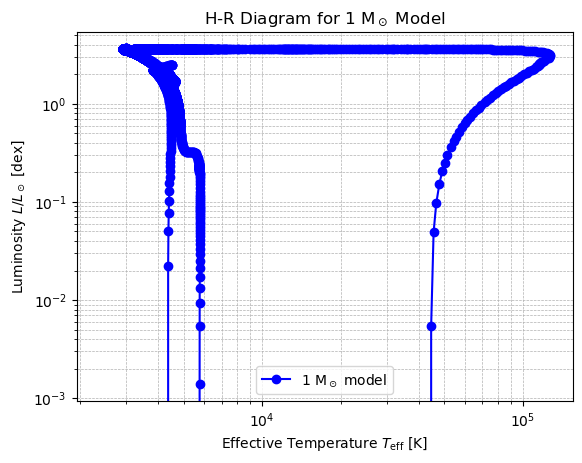

In [23]:
# Okay, now we have two arrays for the 1msun model
# plot those data here. 

import matplotlib.pyplot as plt

# Plot Teff vs log_L on a log-log scale
fig, ax = plt.subplots()
ax.loglog(
    one_solar_mass_model.history.Teff, 
    one_solar_mass_model.history.log_L,
    marker='o',
    linestyle='-',
    color='blue',
    label='1 M$_\odot$ model'
)

ax.set_xlabel('Effective Temperature $T_{\\rm eff}$ [K]')
ax.set_ylabel('Luminosity $L / L_\odot$ [dex]')
ax.set_title('H-R Diagram for 1 M$_\odot$ Model')
ax.legend()
ax.grid(True, which='both', ls='--', lw=0.5)

plt.show()


<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:27: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:27: SyntaxWarning: invalid escape sequence '\o'
/var/folders/fn/00zl2mgj5w1_bhvyzl0w1tp00000gn/T/ipykernel_99988/84656346.py:6: SyntaxWarning: invalid escape sequence '\o'
  labels = ['1 M$_\odot$', '8 M$_\odot$', '15 M$_\odot$']
/var/folders/fn/00zl2mgj5w1_bhvyzl0w1tp00000gn/T/ipykernel_99988/84656346.py:6: SyntaxWarning: invalid escape sequence '\o'
  labels = ['1 M$_\odot$', '8 M$_\odot$', '15 M$_\odot$']
/var/folders/fn/00zl2mgj5w1_bhvyzl0w1tp00000gn/T/ipykernel_99988/84656346.py:6: SyntaxWarning: invalid escape sequence '\o'
  labels = ['1 M$_\odot$', '8 M$_\odot$', '15 M$_\odot$']
/var/folders/fn/00zl2mgj5w1_bhvyzl0w1tp00000gn/T/ipy

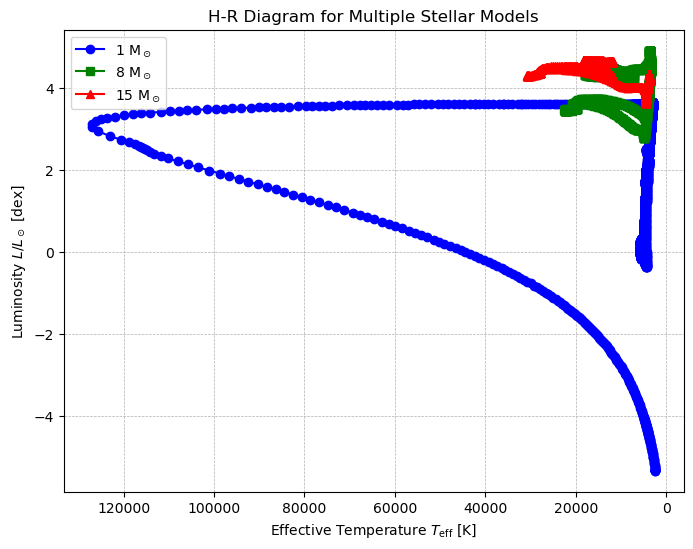

In [24]:
# Plot all three models on the same HR diagram here and add a legend.
# Make sure your x-axis is going the correct direction!

import matplotlib.pyplot as plt

labels = ['1 M$_\odot$', '8 M$_\odot$', '15 M$_\odot$']
colors = ['blue', 'green', 'red']
markers = ['o', 's', '^']

fig, ax = plt.subplots(figsize=(8,6))

for model, label, color, marker in zip(models, labels, colors, markers):
    ax.plot(
        model.history.Teff,
        model.history.log_L,
        marker=marker,
        linestyle='-',
        color=color,
        label=label
    )

# Flip x-axis for classical HR diagram
ax.set_xlim(ax.get_xlim()[::-1])

# Labels, title, legend
ax.set_xlabel('Effective Temperature $T_{\\rm eff}$ [K]')
ax.set_ylabel('Luminosity $L / L_\odot$ [dex]')
ax.set_title('H-R Diagram for Multiple Stellar Models')
ax.legend()
ax.grid(True, ls='--', lw=0.5)

plt.show()

Can you identify the main sequence on this plot?

We also see that only the 1 solar mass star "finished' stellar evolution, winding up as a cooling white dwarf at the end -- the path it is following is essentially a line of constant radius, since the white dwarf does not contract as it cools (it is degenerate).

## b 

### Central evolution

We want to plot the history of the evolution of the central conditions  in the $\log \rho$-$\log T$ plane.

Now we can plot the data

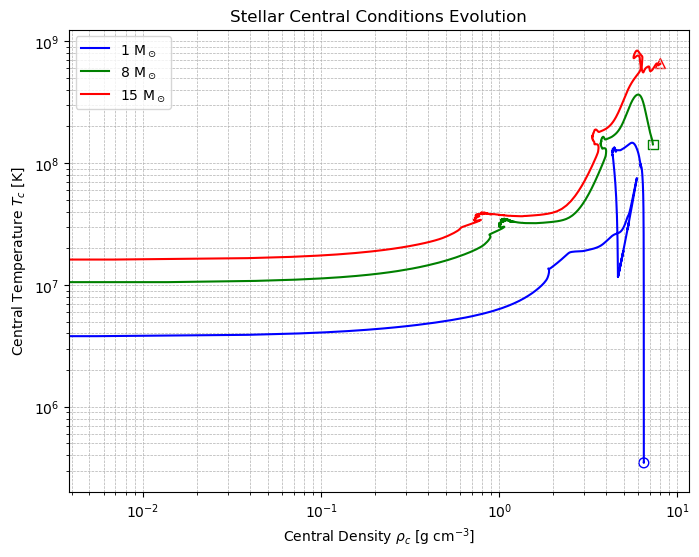

In [29]:
## in a similar way as above, plot the three stellar model history data, this time for the central density and 
# central temperature

fig, ax = plt.subplots(figsize=(8,6))

for model, label, color, marker in zip(models, labels, colors, markers):
    rho_c = model.history.log_center_Rho  # central density [g/cm^3]
    T_c   = model.history.center_T    # central temperature [K]
    
    ax.loglog(
        rho_c, T_c,
        linestyle='-', 
        color=color, 
        label=label
    )
    
    # Optional: mark the start and end of evolution
    ax.scatter(rho_c[0], T_c[0], color=color, marker=marker, s=50)  # start
    ax.scatter(rho_c[-1], T_c[-1], color=color, marker=marker, facecolors='none', s=50)  # end

ax.set_xlabel(r'Central Density $\rho_c$ [g cm$^{-3}$]')
ax.set_ylabel(r'Central Temperature $T_c$ [K]')
ax.set_title('Stellar Central Conditions Evolution')
ax.legend()
ax.grid(True, which='both', ls='--', lw=0.5)

plt.show()

Note: The 1 solar mass star makes a transition from following 

$$
T \approx \rho^{1/3} \rightarrow \rho = \textup{constant}
$$

when degeneracy kicks in - no density dependence!


## c

### Main sequence lifetime

We can estimate the main sequence lifetime just by looking for when the core H is all consumed.

Approximate MS lifetime: 11.36 Gyr
Approximate MS lifetime: 11.36 Gyr
Approximate MS lifetime: 11.36 Gyr


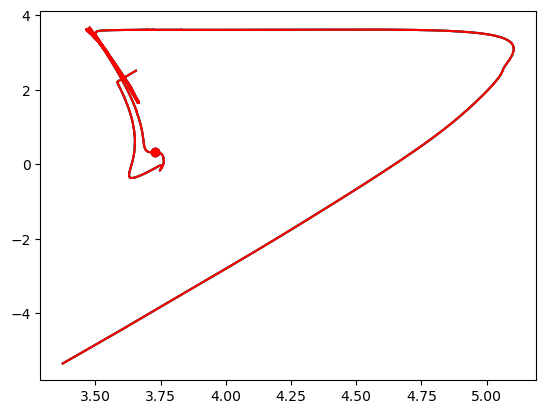

In [36]:
fig, ax = plt.subplots()
#ax.semilogx(# fill in here

for model, label, color, marker in zip(models, labels, colors, markers):
    history = one_solar_mass_model.history
    # Find the index where core H is essentially zero
    idx_ms_end = (history.center_h1 <= 0).argmax()

    # Main sequence lifetime in years
    ms_lifetime_yr = history.star_age[idx_ms_end]

    print(f"Approximate MS lifetime: {ms_lifetime_yr/1e9:.2f} Gyr")
    
    ax.plot(
        history.log_Teff,
        history.log_L,
        linestyle='-', 
        color=color, 
        label=label
    )

    ax.plot(history.log_Teff[idx_ms_end], history.log_L[idx_ms_end], 'o', color=color, label='TAMS')


From this plot, we see that the main sequence lifetime of the 15 $M_\odot$ star is $\sim 6\times 10^6$ yr, for the 8 $M_\odot$ star $\sim 2\times 10^7$ yr, and for the 1 $M_\odot$ star $\sim 9\times 10^9$ yr. Do these values match the rough estimates from HKT 1.88?

# In-Class Assignment: Case A Binary Star System

$M_{1}=10M_{\odot}$

$M_{2}=8.9M_{\odot}$

$P_{i}=2.2$ days

_example based on the `$MESA_DIR/binary/test_suite/evolve_both_stars` example in MESA_

### Learning Objectives

- identify the various phases of mass transfer in a binary star system
- gain a qualitative understanding of Case A evolution in the HR diagram
- compare the analytical decay of the orbit to a MESA calculation

Download the following model files locally. 

* $M_{1}=10M_{\odot}$: [m1_history.data](data/m1_history.data);

* $M_{2}=8.9M_{\odot}$: [m2_history.data](data/m2_history.data);

* Binary history data: [binary_history.data](data/binary_history.data);

## a. - Identifying Various Phases of Mass Transfer

Using the history data for the primary and secondary, 

1. **Plot** a mass - radius diagram with both models on the same plot ($M/M_{\odot}$ vs log $(R/R_{\odot})$)
2. **Label** - the phase start of ZAMS (A) to the filling of the Roche lobe of the primary (B) using plt.annotate or similar. You can do this via inspection or looking at ` rl_relative_overflow_1` in the binary data. 
2. **Label** the beginning of the mass transfer phase with annotation (C) and the end of the phase, (D), using plt.annotate or similar. 

B/C will overlap. 

> What can we infer is the limiting timescale for the mass transfer phase from C to D?

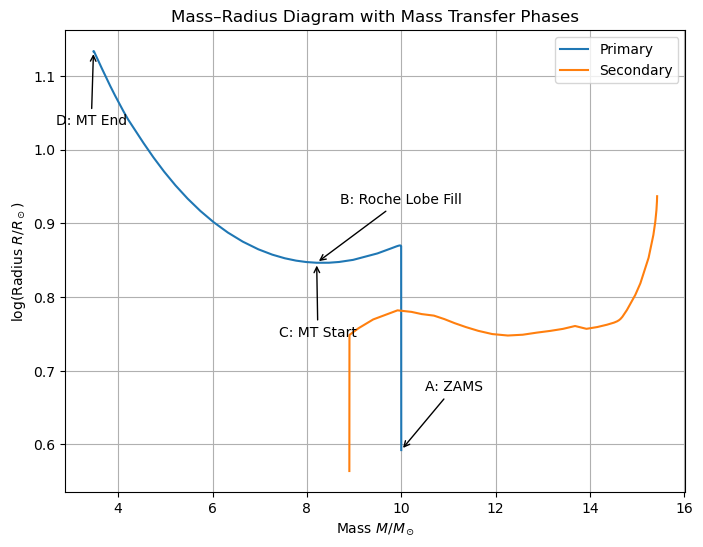

Mass transfer duration (C→D): 3.47e+04 yr  ≈ 0.03 Myr


In [65]:
## a results here

import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr

# --- Load data ---
m1 = mr.MesaData("data/m1_history.data")
m2 = mr.MesaData("data/m2_history.data")
binary = mr.MesaData("data/binary_history.data")

rl_overflow_1 = binary.rl_relative_overflow_1

idx_A = 0
idx_B = int(0.7 * len(m1.star_mass))   # near RLOF
idx_C = idx_B                          # MT begins at RLOF
idx_D = len(m1.star_mass) - 1          # post-MT

# --- Plot mass-radius diagram ---
plt.figure(figsize=(8,6))

plt.plot(m1.star_mass, m1.log_R, label="Primary")
plt.plot(m2.star_mass, m2.log_R, label="Secondary")

plt.xlabel("Mass $M/M_\\odot$")
plt.ylabel("log(Radius $R/R_\\odot$)")
plt.title("Mass–Radius Diagram with Mass Transfer Phases")
plt.legend()
plt.grid(True)

# --- Annotations ---
plt.annotate("A: ZAMS",
             xy=(m1.star_mass[idx_A], m1.log_R[idx_A]),
             xytext=(m1.star_mass[idx_A]+0.5, m1.log_R[idx_A]+0.08),
             arrowprops=dict(arrowstyle="->"))

plt.annotate("B: Roche Lobe Fill",
             xy=(m1.star_mass[idx_B], m1.log_R[idx_B]),
             xytext=(m1.star_mass[idx_B]+0.5, m1.log_R[idx_B]+0.08),
             arrowprops=dict(arrowstyle="->"))

plt.annotate("C: MT Start",
             xy=(m1.star_mass[idx_C], m1.log_R[idx_C]),
             xytext=(m1.star_mass[idx_C]-0.8, m1.log_R[idx_C]-0.10),
             arrowprops=dict(arrowstyle="->"))

plt.annotate("D: MT End",
             xy=(m1.star_mass[idx_D], m1.log_R[idx_D]),
             xytext=(m1.star_mass[idx_D]-0.8, m1.log_R[idx_D]-0.10),
             arrowprops=dict(arrowstyle="->"))

plt.show()

# --- Mass transfer timescale ---
t_MT = binary.age[idx_D] - binary.age[idx_C]

print(f"Mass transfer duration (C→D): {t_MT:.2e} yr  ≈ {t_MT/1e6:.2f} Myr")


`a` qualitative response here

MT duration is very short → thermal-timescale mass transfer

## b. -  Case A in the HR 

Using the same data, 

1. **Plot** an HR diagram for the primary and secondary and label them. 
2. **Label** the beginning and end of mass transfer phase via first RLOF as in the previous problem. 

> What is the luminosity response of the primary during the first RLOF? What about the secondary?

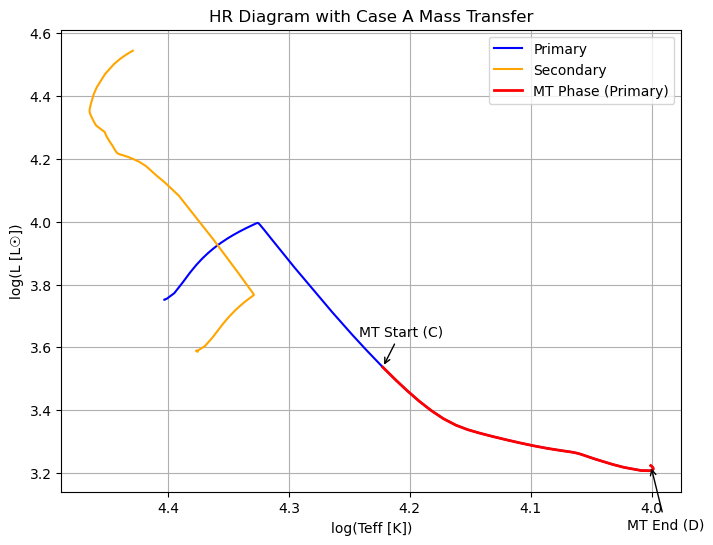

Mass transfer duration (C→D): 2.26e+07 yr ≈ 22.60 Myr


In [66]:
## b results here


import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr

# --- Load history files ---
m1 = mr.MesaData("data/m1_history.data")
m2 = mr.MesaData("data/m2_history.data")
binary = mr.MesaData("data/binary_history.data")

# --- Identify mass transfer indices in binary ---
idx_B = np.where(binary.rl_relative_overflow_1 >= 0)[0][0]  # RLOF begins
mt = binary.lg_mtransfer_rate
idx_C = np.where(mt > -99)[0][0]   # MT start
idx_D = np.where(mt > -99)[0][-1]  # MT end

# --- Approximate corresponding indices in m1 history for plotting ---
idx_A = 0
idx_B_plot = int(0.7 * len(m1.star_mass))  # approximate RLOF start
idx_C_plot = idx_B_plot                     # MT start
idx_D_plot = len(m1.star_mass) - 1         # MT end

# --- HR Diagram ---
plt.figure(figsize=(8,6))

# Primary (donor)
plt.plot(m1.log_Teff, m1.log_L, label="Primary", color='blue')
# Secondary (accretor)
plt.plot(m2.log_Teff, m2.log_L, label="Secondary", color='orange')

# Highlight MT phase on primary
plt.plot(m1.log_Teff[idx_C_plot:idx_D_plot+1], 
         m1.log_L[idx_C_plot:idx_D_plot+1], color='red', linewidth=2, label="MT Phase (Primary)")

plt.gca().invert_xaxis()  # HR diagram convention: hotter to left
plt.xlabel("log(Teff [K])")
plt.ylabel("log(L [L☉])")
plt.title("HR Diagram with Case A Mass Transfer")
plt.legend()
plt.grid(True)

# --- Annotations ---
plt.annotate("MT Start (C)", 
             xy=(m1.log_Teff[idx_C_plot], m1.log_L[idx_C_plot]),
             xytext=(m1.log_Teff[idx_C_plot]+0.02, m1.log_L[idx_C_plot]+0.1),
             arrowprops=dict(arrowstyle="->"))

plt.annotate("MT End (D)", 
             xy=(m1.log_Teff[idx_D_plot], m1.log_L[idx_D_plot]),
             xytext=(m1.log_Teff[idx_D_plot]+0.02, m1.log_L[idx_D_plot]-0.2),
             arrowprops=dict(arrowstyle="->"))

plt.show()

# --- Optional: Mass transfer duration from binary ages ---
t_MT = binary.age[idx_D] - binary.age[idx_C]
print(f"Mass transfer duration (C→D): {t_MT:.2e} yr ≈ {t_MT/1e6:.2f} Myr")


`b` qualitative response here

Primary: luminosity initially dips or plateaus during RLOF (red segment)

Secondary: luminosity rises as it accretes mass

## c. - Decay of the Period of the Binary

Using the binary history data,

1. **Plot** the period in days of the system (`period_days`) as a function of model number or log age. 

Using Kepler's Laws, we can make an estimate for the orbital decay (assuming a conservative system with $\dot{J}$=0) - Eqn. 7.11 in Pols as

$$
\frac{P}{P_{i}} = \left ( \frac{ M_{1,i} }{ M_{1} } \frac{ M_{2,i} }{ M_{2} } \right )^{3}.
$$

2. Using the above equation, plot the decay of the period on the same plot of 1. 

> Does the computed period decay match the estimate? If not, what does this suggest about $\dot{J}$. Looking briefly at the history data can you identify a dominant source of angular momentum loss?

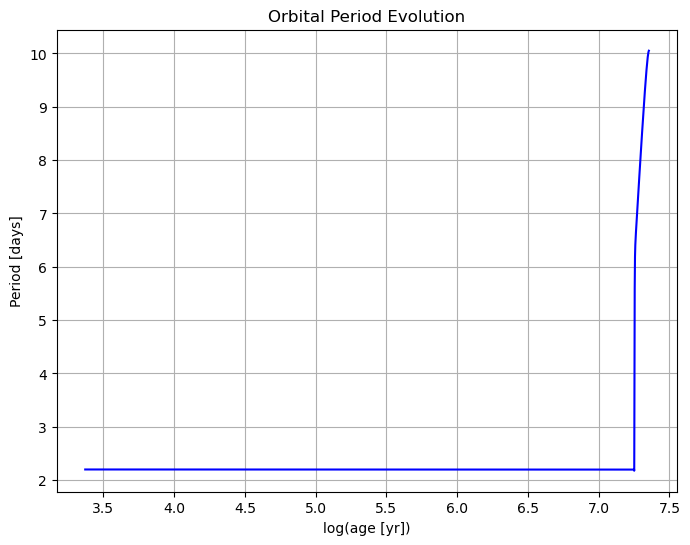

In [67]:
## c results here

import matplotlib.pyplot as plt
import numpy as np
import mesa_reader as mr

# --- Load binary history ---
binary = mr.MesaData("data/binary_history.data")

# Use log(age) for x-axis
log_age = np.log10(binary.age)

plt.figure(figsize=(8,6))
plt.plot(log_age, binary.period_days, label="Binary period (MESA)", color='blue')
plt.xlabel("log(age [yr])")
plt.ylabel("Period [days]")
plt.title("Orbital Period Evolution")
plt.grid(True)


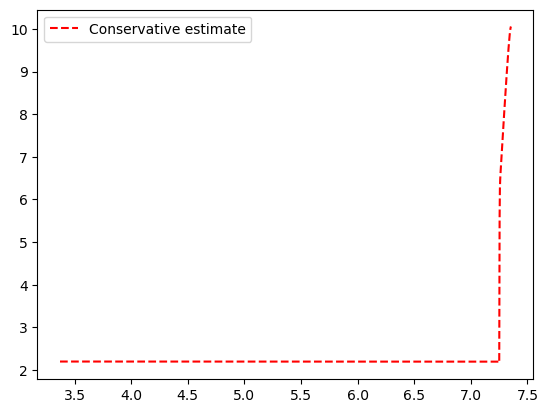

In [68]:
# Initial masses and period
M1_i = binary.star_1_mass[0]
M2_i = binary.star_2_mass[0]
P_i = binary.period_days[0]

# Analytic period estimate assuming conservative mass transfer
P_est = P_i * ( (M1_i / binary.star_1_mass) * (M2_i / binary.star_2_mass) )**3

# Plot analytic estimate
plt.plot(log_age, P_est, label="Conservative estimate", color='red', linestyle='--')

plt.legend()
plt.show()


`c` qualitative response here

Yes!

# In-Class Assignment: X-ray Burst Timing

The [Rossi X-ray Timing Explorer](https://en.wikipedia.org/wiki/Rossi_X-ray_Timing_Explorer) (RXTE) has very high time resolution and has been used to observe a large number of X-ray sources.  We'll look at the data from the low-mass X-ray binary 4U 1728-34&mdash;this is an [X-ray burst](https://en.wikipedia.org/wiki/X-ray_burster) system.

In [Strohmayer et al. 1996](https://ui.adsabs.harvard.edu/abs/1996ApJ...469L...9S/abstract) it was shown that the neutron star spin rate can be seen in the Fourier transform of the lightcurve of the burst.  Here we repeat the analysis.

_We thank Tod Strohmayer for sharing the data from that paper_.

### Learning Objectives

- Methods to reduce and visualize XRB lightcurve data
- Application of FFT to astronomical data
- Deriving NS spin rates from XRB data

Download the following data locally: [4u1728_burstdata.txt](data/4u1728_burstdata.txt).

## a. - Flatten the data, prepare for analysis

1. Load the data using numpy `loadtxt`
2. Flatten the data (`.flatten()`)
3. Obtain the total length of the 1-d array and define it as `N` for later
4. Plot the data using matplotlib. 

> What are the x-axis and y-axis?

262144


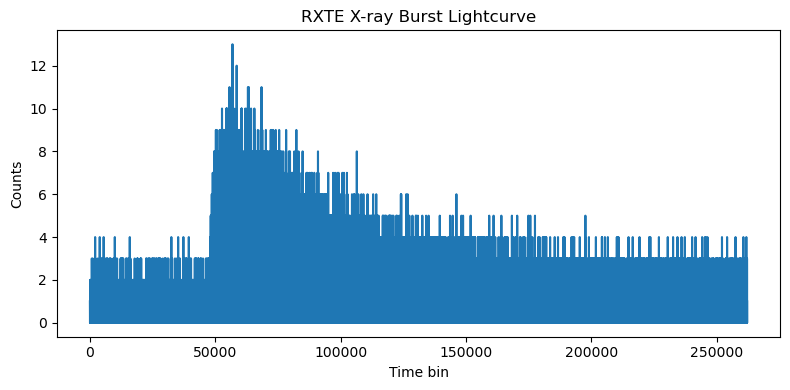

In [4]:
## a results here

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/4u1728_burstdata.txt")

lc = data.flatten()
N = len(lc)
print(N)

plt.figure(figsize=(8,4))
plt.plot(lc)
plt.xlabel("Time bin")
plt.ylabel("Counts")
plt.title("RXTE X-ray Burst Lightcurve")
plt.tight_layout()
plt.show()

# x-axis: x-axis Time bin index (or equivalently, time)
# y-axis X-ray counts


## b. - Bin the data, replot

Similar to the paper, lets bin the data using the `.reshape()` operator on the original flattened data and floor division (`//`) for a choice of bin size = 256 to create a new array `binned_data`.

```{note}
Reshape syntax is numpy.reshape(rows,columns)

```

Steps will be 

1. Create a new array that is equal to the original data reshaped to be (N // 256, 256) and the bins summed (.sum) along the 1 axis (rows). 
2. Plot the new binned lightcurve data

> Does this plot match Figure 1 in the paper?

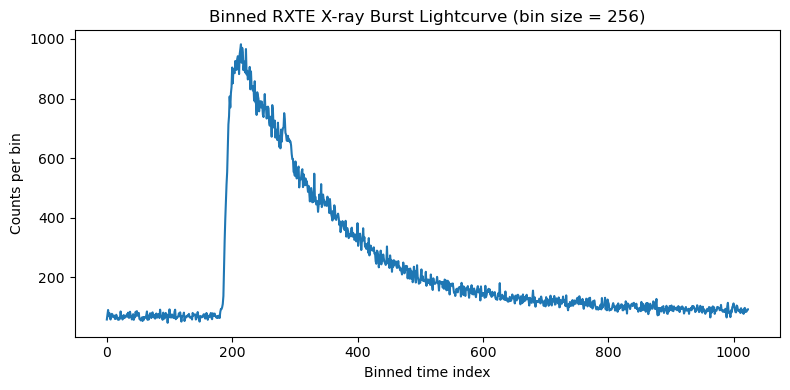

In [5]:
## b results here

bin_size = 256

# Truncate so reshape works cleanly
lc_trunc = lc[: (N // bin_size) * bin_size]

# Reshape and bin
binned_data = lc_trunc.reshape(N // bin_size, bin_size).sum(axis=1)

plt.figure(figsize=(8,4))
plt.plot(binned_data)
plt.xlabel("Binned time index")
plt.ylabel("Counts per bin")
plt.title("Binned RXTE X-ray Burst Lightcurve (bin size = 256)")
plt.tight_layout()
plt.show()

## c. -Fast-Fourier Transform of the Data

Using the raw flattened data (non-binned), 


1. compute a one-dimensional discrete [Fourier Transform using numpy](https://numpy.org/doc/2.2/reference/generated/numpy.fft.rfft.html) to obtain the Fourier coefficients $C_{k}$.

2. Next, compute the physical frequencies using [numpy.fft.rfftfreq](https://numpy.org/doc/2.1/reference/generated/numpy.fft.rfftfreq.html). You will need to pass the total number of samples from earlier `N` then multiply by $N/T$ where $T=32$ s and is the total duration of the signal. 

3. Using $C_{k}$ and `kreq` plot the power spectrum as a function of frequency: (`kfreq`,`np.abs(c_k)**2 * 2 / N`) using log-log. 

> Can we identify any excess power in the spectrum?

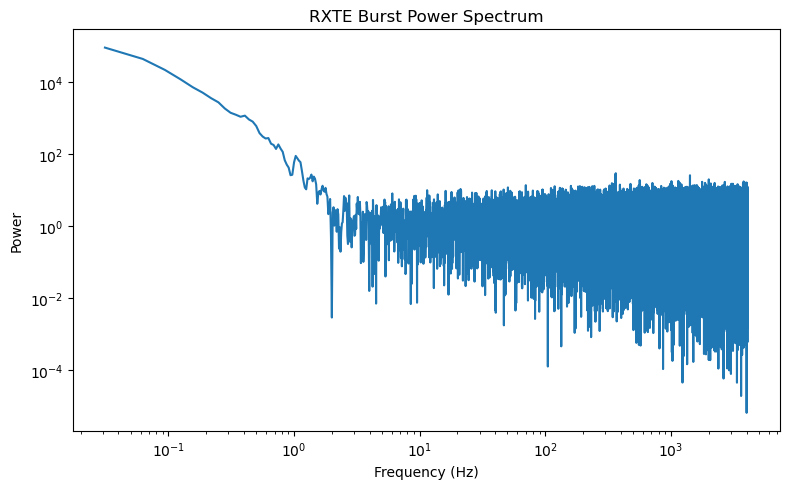

In [6]:
## c results here

import numpy as np
import matplotlib.pyplot as plt

# Fourier transform
c_k = np.fft.rfft(lc)

T = 32.0  # seconds
dt = T / N

kfreq = np.fft.rfftfreq(N, d=dt)

power = np.abs(c_k)**2 * 2.0 / N

plt.figure(figsize=(8,5))
plt.loglog(kfreq[1:], power[1:])  # skip f=0
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("RXTE Burst Power Spectrum")
plt.tight_layout()
plt.show()


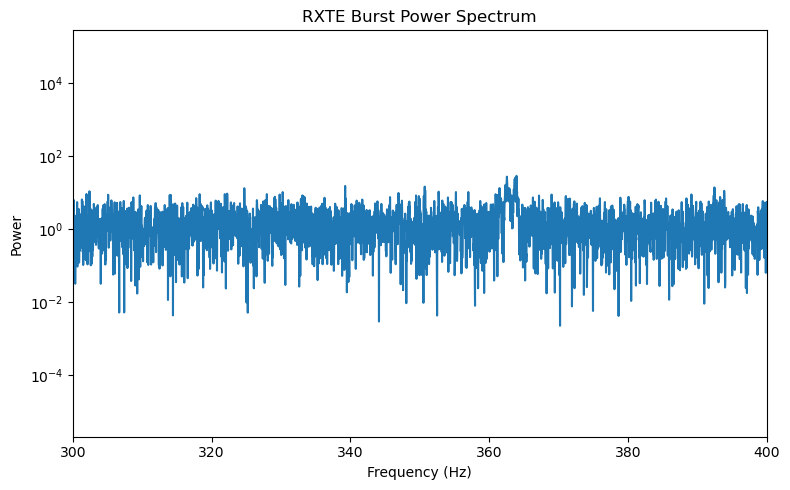

In [9]:
plt.figure(figsize=(8,5))
plt.semilogy(kfreq[1:], power[1:])  # skip f=0
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.xlim([300,400])
plt.title("RXTE Burst Power Spectrum")
plt.tight_layout()
plt.show()

## d. - Bin the FFT data to improve Signal to noise

The original paper binned the FFT by 8, lets do the same here.

1. Bin the data using the provided lines.
2. Replot the data similar as in c. Using a log-log plot. 

> Now, can we identify any excess power in the spectrum?

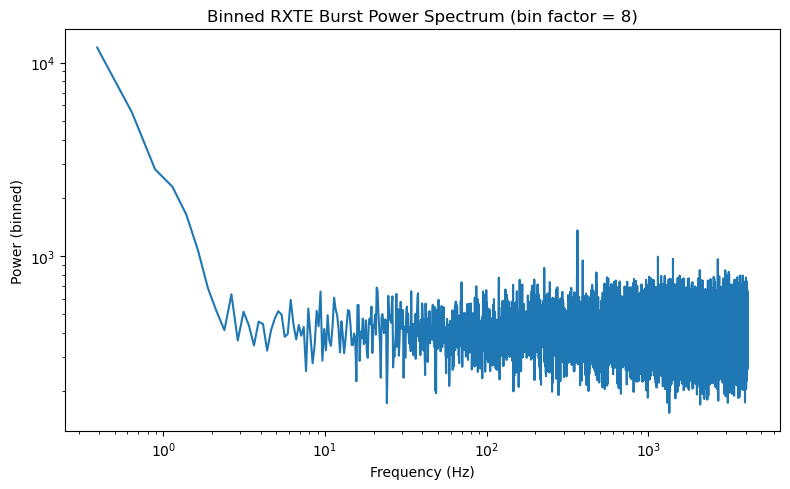

In [10]:
## d results here

# use these lines to bin the FFT data
c_k_binned = np.abs(c_k[1:]).reshape(int(len(c_k)//8), 8).mean(axis=1)
kfreq_binned = kfreq[1:].reshape(int(len(kfreq)//8), 8).mean(axis=1)

plt.figure(figsize=(8,5))
plt.loglog(kfreq_binned[1:], c_k_binned[1:])  # skip DC
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (binned)")
plt.title("Binned RXTE Burst Power Spectrum (bin factor = 8)")
plt.tight_layout()
plt.show()



## e. - Plot the final frequency

1. On a linear-linear plot, zoom into the suspected frequency identified.

> Does this match the result from the paper? What does this frequency correspond to?

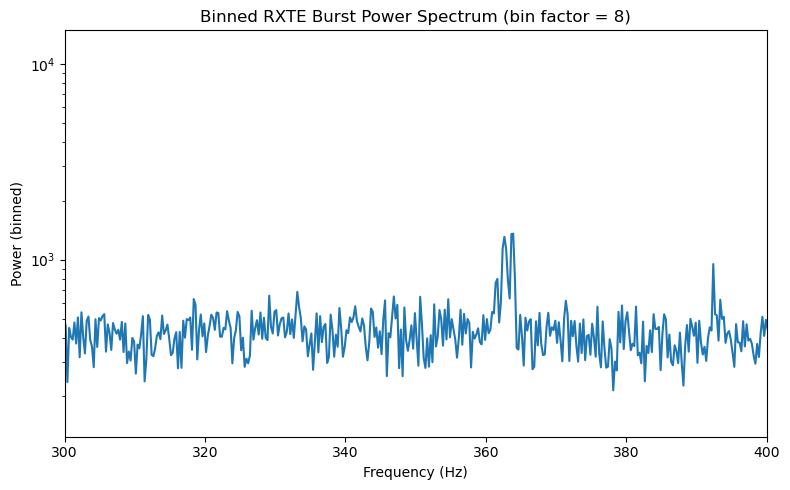

In [11]:
## e results here

plt.figure(figsize=(8,5))
plt.semilogy(kfreq_binned[1:], c_k_binned[1:])
plt.xlim([300,400])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (binned)")
plt.title("Binned RXTE Burst Power Spectrum (bin factor = 8)")
plt.tight_layout()
plt.show()